## Library Installation and Imports

We install the necessary libraries for data analysis and machine learning, including `yellowbrick` for visualizations and `statsmodels` for statistical models. We also import various modules for data manipulation, preprocessing, visualization, clustering, and modeling to support the analysis and model development tasks.


In [ ]:
!pip install yellowbrick
!pip install -U statsmodels

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.spatial.distance import pdist
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree



## Loading and Inspecting the Data

We load the dataset from a CSV file named "mcdonalds (1).csv" into a DataFrame named `df`. Using `df.head()`, we display the first few rows of the DataFrame to get a quick overview of the data's structure and content.


In [ ]:
df = pd.read_csv("mcdonalds (1).csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## DataFrame Dimensions

The `df.shape` attribute reveals the dimensions of the DataFrame, including the number of rows and columns. This information helps to understand the size and structure of the dataset.


In [ ]:
df.shape

(1453, 15)

##Dataset Overview

The `df.info()` method provides a summary of the DataFrame, including the number of entries, column names, count of non-null values per column, data types of each column, and memory usage. This overview helps in understanding the structure and completeness of the data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


## Exploratory Data Analysis

In this section, we perform exploratory data analysis (EDA) on the dataset. The function generates count plots for categorical variables and distribution plots for numerical variables, providing insights into the data distribution. Additionally, it computes and displays the correlation matrix for numerical columns to understand relationships between variables.


     Age
Age  1.0


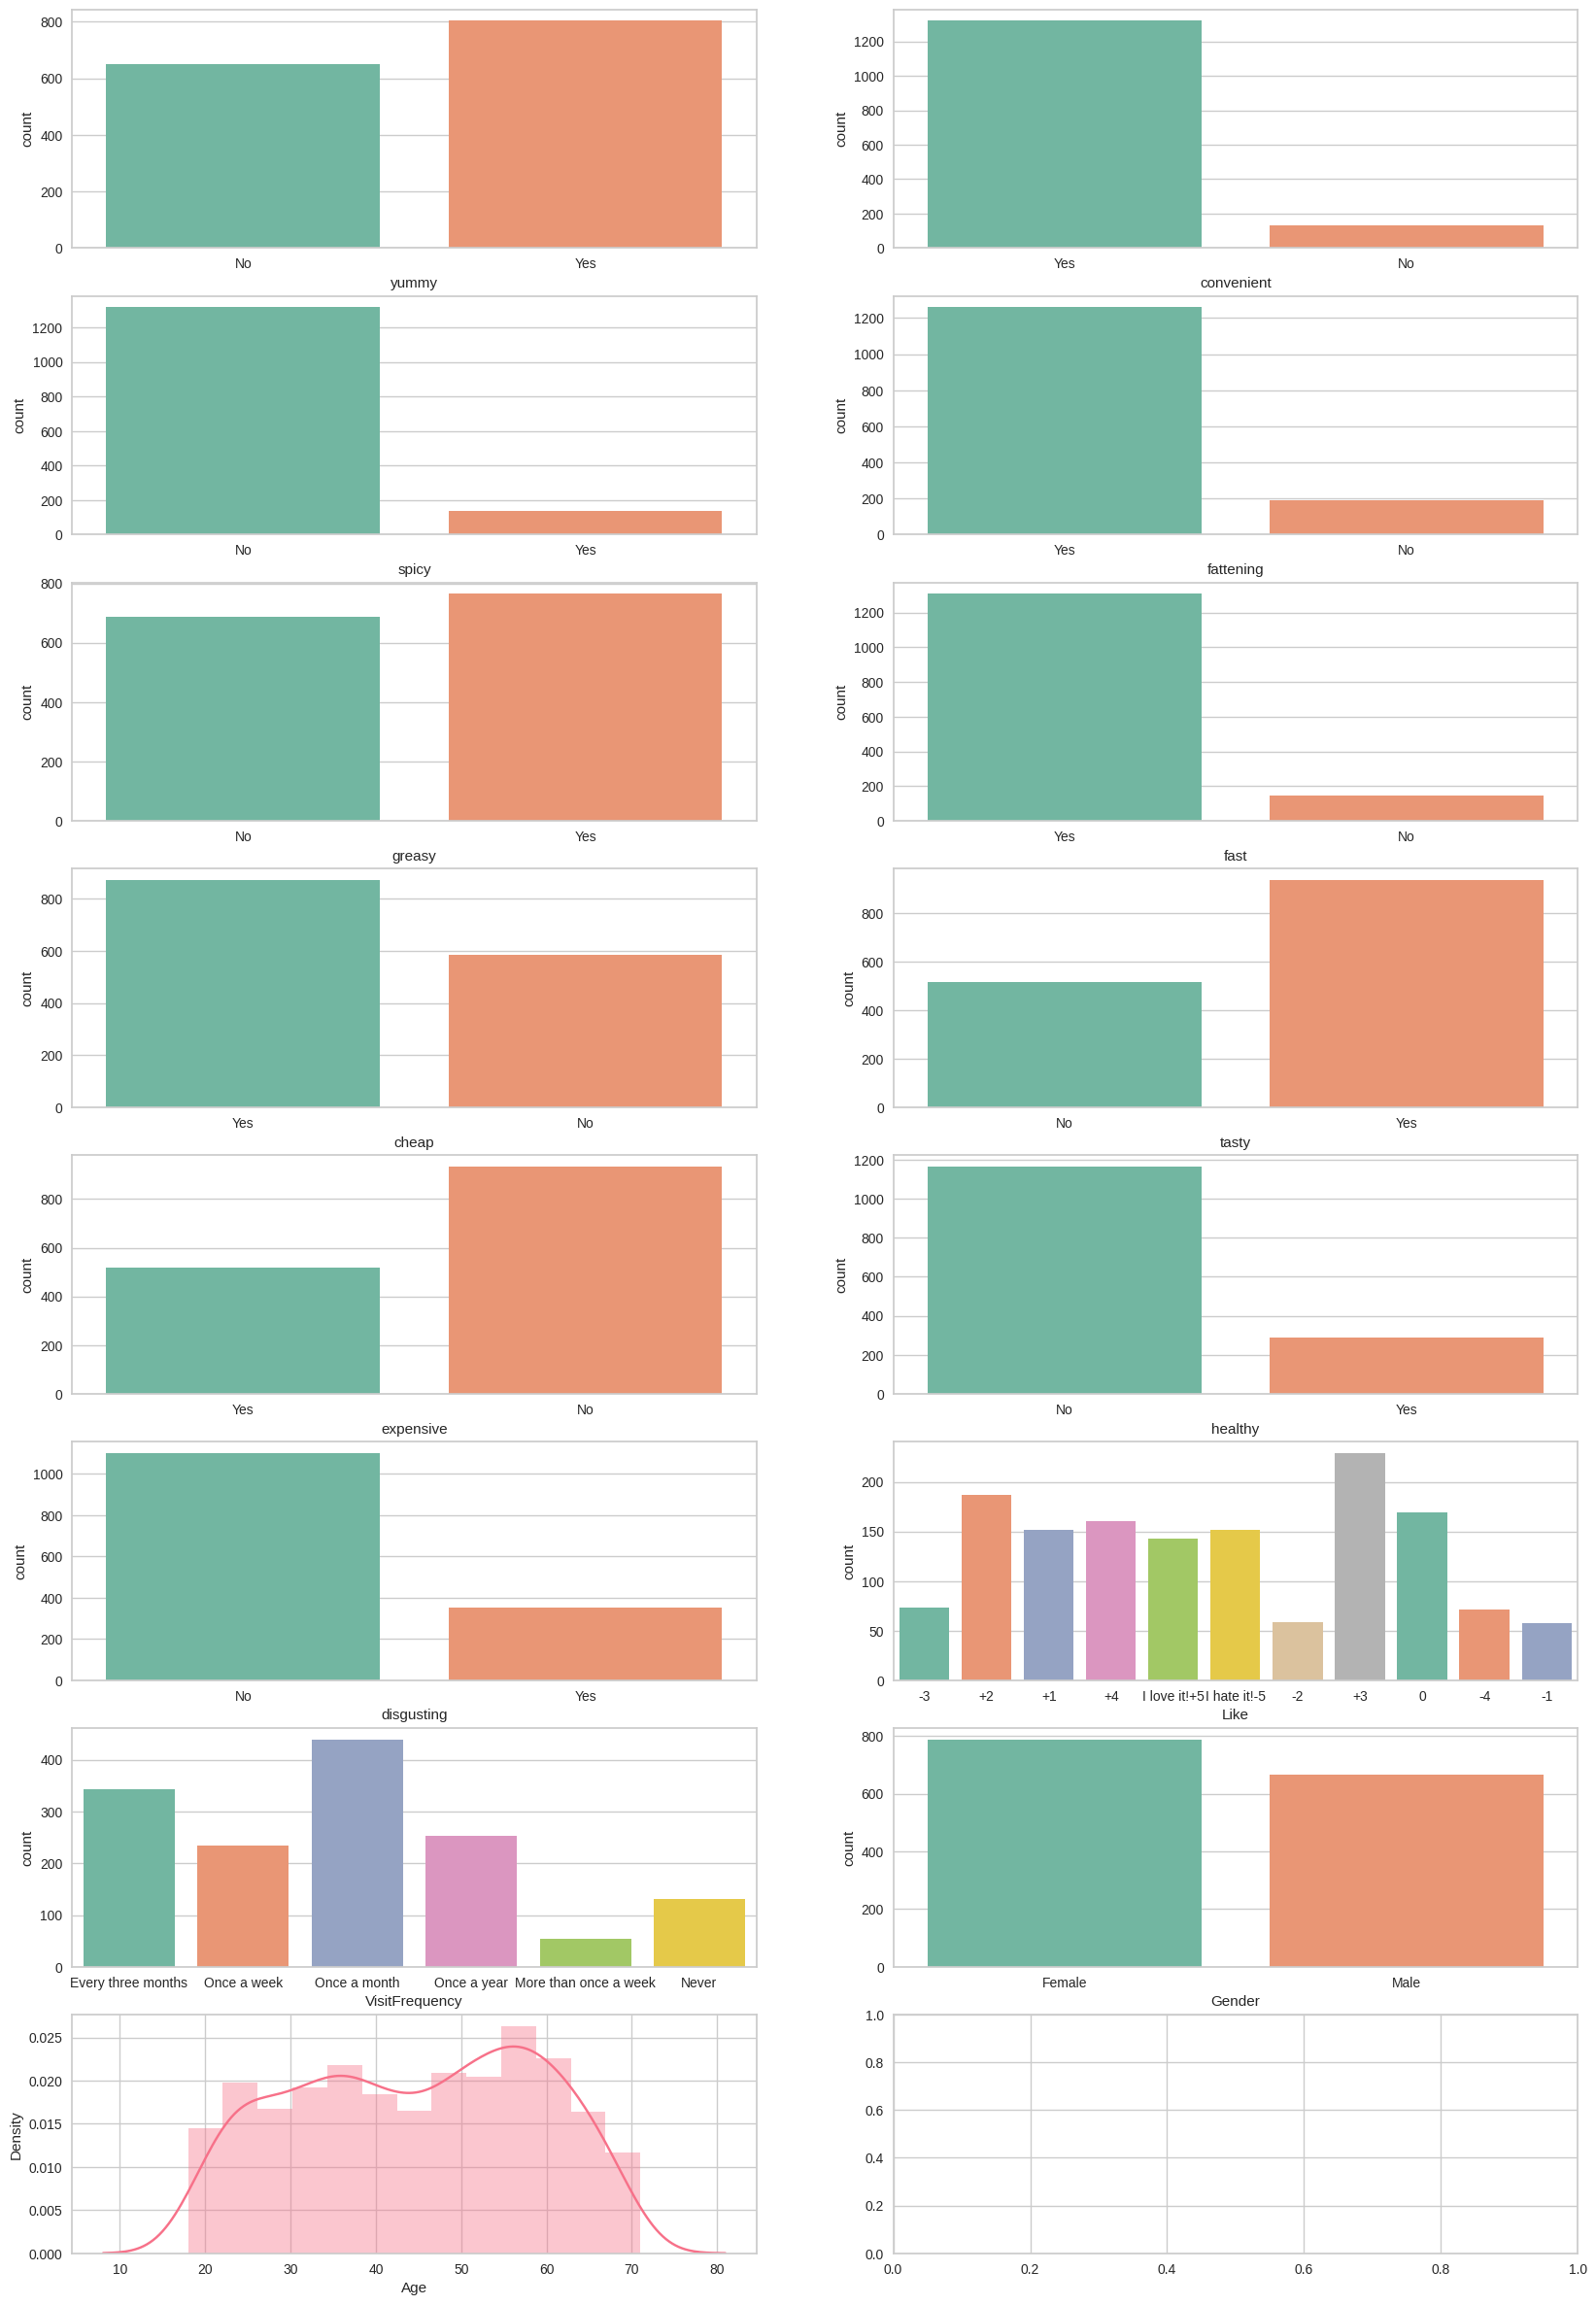

In [ ]:
def explore_data(df, fig_size):
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_df = df.select_dtypes(exclude=['object'])

    import warnings
    warnings.filterwarnings("ignore")
    num_rows = int(np.ceil((len(categorical_cols) + len(numerical_df.columns) + 1) / 2))
    fig, axs = plt.subplots(num_rows, 2, figsize=fig_size)

    for i, col in enumerate(categorical_cols):
        ax = axs[i // 2, i % 2]
        sns.countplot(x=col, data=df, ax=ax, palette="Set2")

    for i, col in enumerate(numerical_df.columns):
        ax = axs[(i + len(categorical_cols)) // 2, (i + len(categorical_cols)) % 2]
        sns.distplot(numerical_df[col], ax=ax, color=sns.color_palette("husl", 8)[i % 8])

    print(numerical_df.corr())

explore_data(df, (20,30))


## Dropping Columns from DataFrame

We remove the columns 'Like', 'Age', 'VisitFrequency', and 'Gender' from the DataFrame `df`, resulting in a new DataFrame `df_dropped`. The `df_dropped.head()` method displays the first few rows of this modified DataFrame to verify the removal of these columns.


In [ ]:
df_dropped = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)


In [ ]:
df_dropped.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


## Encoding Categorical Features

In this section, we apply `LabelEncoder` to transform categorical features into numerical values. This is a crucial step for preparing data for machine learning models.


In [ ]:
df_encoded = df_dropped.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


## Calculate and Display Means of Encoded Features

In this section, we compute the mean of the encoded features and round the results to two decimal places. This helps us understand the average value of each feature in the transformed dataset.


In [ ]:
means = df_encoded.mean().round(2)
print(means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


## Apply PCA and Create Principal Components DataFrame

In this section, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the encoded features to 11 principal components. We then create a DataFrame to store these components for further analysis.


In [ ]:
pca = PCA(n_components=11)
pc = pca.fit_transform(df_encoded)
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pf = pd.DataFrame(data=pc, columns=names)
pf.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


## Principal Components Analysis (PCA) Results

In this section, we calculate and display the standard deviations, proportion of variance, and cumulative proportion for each principal component. This helps us understand the importance of each component and how much variance they explain in the data.


In [ ]:
standard_deviations = np.sqrt(pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Importance of Components:")
print(f"{'Component':<10} {'Standard Deviation':<20} {'Proportion of Variance':<25} {'Cumulative Proportion':<25}")

for i in range(len(standard_deviations)):
    print(f"PC{i+1:<8} {standard_deviations[i]:<20.4f} {explained_variance_ratio[i]:<25.4f} {cumulative_variance_ratio[i]:<25.4f}")


Importance of Components:
Component  Standard Deviation   Proportion of Variance    Cumulative Proportion    
PC1        0.7570               0.2994                    0.2994                   
PC2        0.6075               0.1928                    0.4922                   
PC3        0.5046               0.1330                    0.6253                   
PC4        0.3988               0.0831                    0.7084                   
PC5        0.3374               0.0595                    0.7679                   
PC6        0.3103               0.0503                    0.8182                   
PC7        0.2897               0.0438                    0.8620                   
PC8        0.2751               0.0395                    0.9016                   
PC9        0.2653               0.0368                    0.9383                   
PC10       0.2488               0.0324                    0.9707                   
PC11       0.2369               0.0293            

## Factor Loadings of Principal Components

In this section, we compute the factor loadings for each principal component. Factor loadings indicate how strongly each feature influences each principal component, providing insight into the relationship between the original features and the principal components.


In [ ]:
loadings = pca.components_.T
print("\nFactor Loadings:")
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
                          index=df_encoded.columns)
print(loading_df.round(2))



Factor Loadings:
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04


## PCA Visualization with Loading Vectors

In this section, we perform Principal Component Analysis (PCA) to reduce the data to 2 principal components. We then create a perceptual map by plotting the PCA results and overlaying the loading vectors to visualize the contributions of each feature to the principal components.


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded)

loadings = pca.components_.T
explained_variance = pca.explained_variance_ratio_

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'],
                           index=df_encoded.columns)

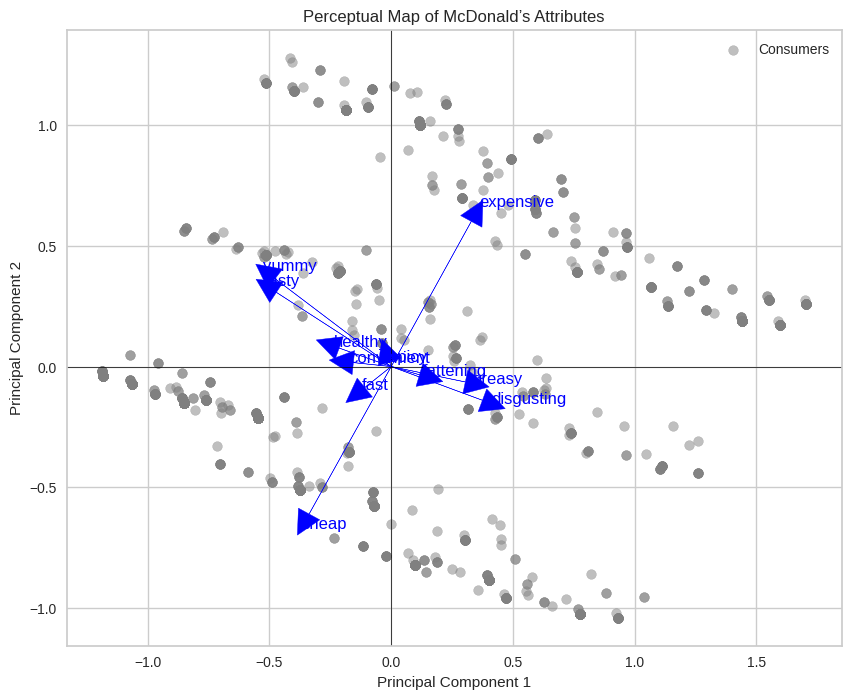

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(df_pca['PC1'], df_pca['PC2'], color='grey', alpha=0.5, label='Consumers')

for i in range(df_loadings.shape[0]):
    plt.arrow(0, 0, df_loadings['PC1'][i], df_loadings['PC2'][i],
              head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(df_loadings['PC1'][i]*1.1, df_loadings['PC2'][i]*1.1, df_loadings.index[i],
             color='blue')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptual Map of McDonald’s Attributes')
plt.grid(True)
plt.legend(loc='best')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


## Determine Optimal Number of Clusters with K-Elbow Method

In this section, we use the K-Elbow method to find the optimal number of clusters for KMeans clustering. The method involves plotting the sum of squared distances from each point to its assigned cluster center and identifying the "elbow" point where adding more clusters yields diminishing returns.


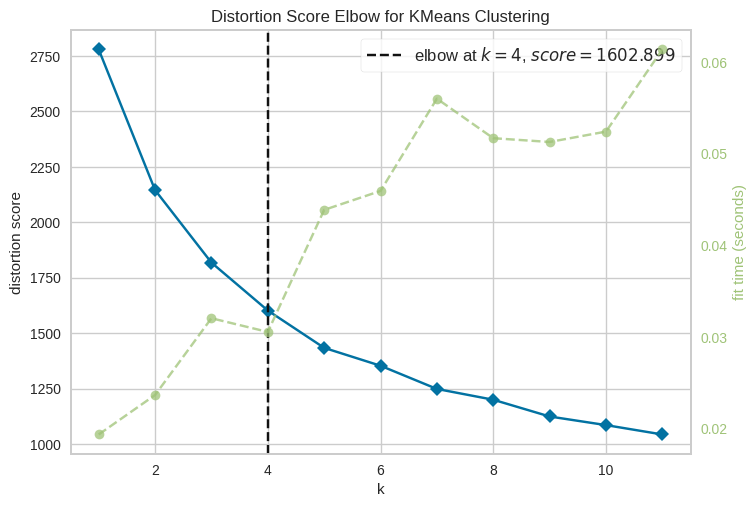

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

## KMeans Clustering and PCA Visualization

In this section, we scale the data and apply KMeans clustering with 4 clusters. We then visualize the clusters on the first two principal components, annotating the plot with feature names to understand how different features are distributed across clusters.


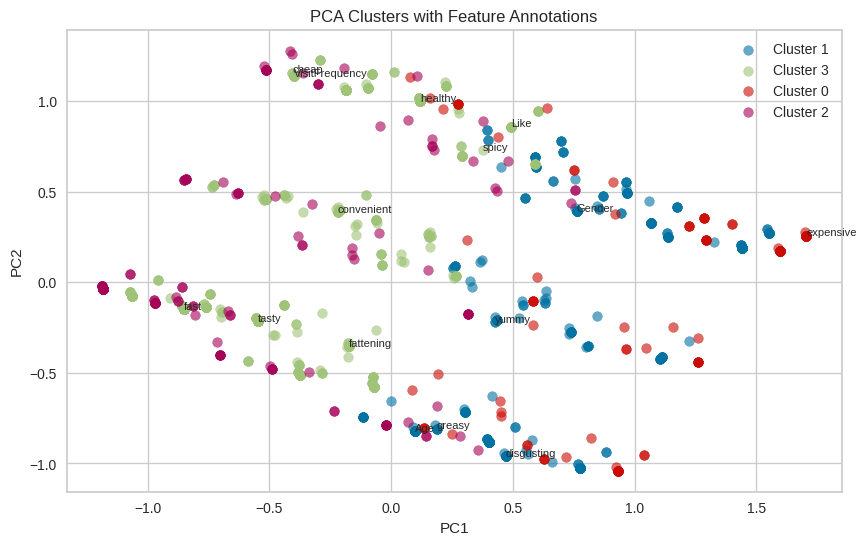

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

df_pca = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
clusters = df_pca['Cluster'].unique()

for cluster in clusters:
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'],
                label=f'Cluster {cluster}', alpha=0.6)

for idx, feature_name in enumerate(df.columns):
    plt.text(pca_result[idx, 0], pca_result[idx, 1], feature_name, fontsize=8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Clusters with Feature Annotations')
plt.legend()
plt.show()


## Evaluate KMeans Clustering Performance

In this section, we perform KMeans clustering with varying numbers of clusters to evaluate the clustering performance. We plot the sum of intra-cluster distances (inertia) for each number of clusters to identify the optimal cluster count by analyzing how the within-cluster variance changes.


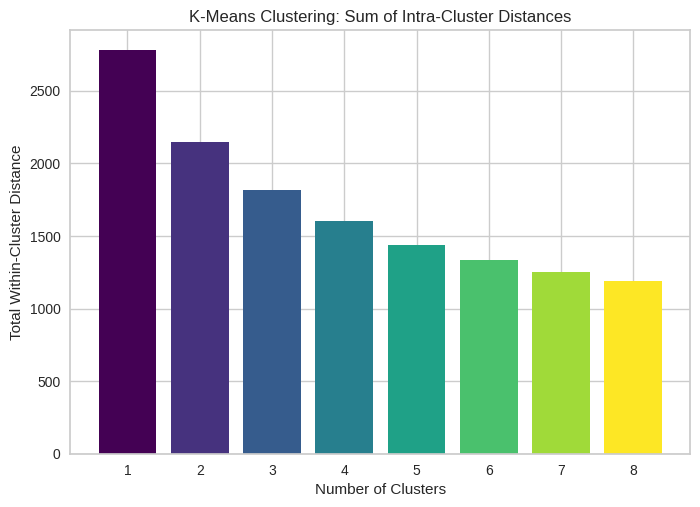

In [ ]:
np.random.seed(1234)
repetitions = 10

clusters_range = list(range(1, 9))
cluster_inertia = []
kmeans_models = {}

for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=repetitions, random_state=1234)
    kmeans.fit(df_encoded)
    cluster_inertia.append(kmeans.inertia_)
    kmeans_models[str(num_clusters)] = kmeans

colors = plt.cm.viridis(np.linspace(0, 1, len(clusters_range)))
plt.bar(clusters_range, cluster_inertia, color=colors)
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Distance")
plt.title("K-Means Clustering: Sum of Intra-Cluster Distances")
plt.show()


## Histogram of Distances to Nearest Cluster Center

In this section, we generate histograms showing the distribution of distances from each data point to the nearest cluster center for different numbers of clusters. This visualization helps to understand the spread and density of data points within each cluster.


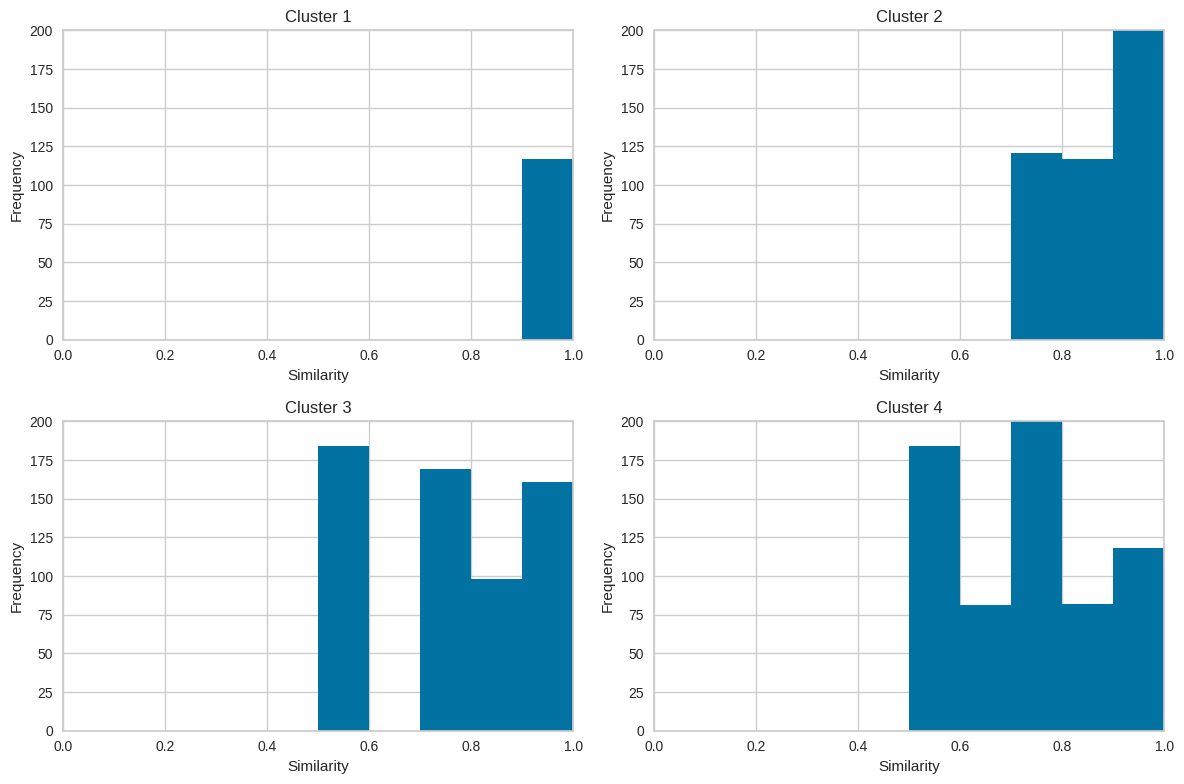

In [ ]:
histogram_range = (0, 1)
bins = 10
frequency_limit = 200

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for cluster_idx in range(1, 5):
    cluster_labels = kmeans_models[str(cluster_idx)].predict(df_encoded)
    closest_distances = kmeans_models[str(cluster_idx)].transform(df_encoded).min(axis=1)
    row_idx = (cluster_idx - 1) // 2
    col_idx = (cluster_idx - 1) % 2
    axes[row_idx, col_idx].hist(closest_distances, bins=bins, range=histogram_range)
    axes[row_idx, col_idx].set_xlabel('Similarity')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Cluster {cluster_idx}')
    axes[row_idx, col_idx].set_xlim(histogram_range)
    axes[row_idx, col_idx].set_ylim(0, frequency_limit)
    axes[row_idx, col_idx].set_xticks(np.linspace(0, 1, 6))

plt.tight_layout()
plt.show()


## Cluster Stability Analysis

In this section, we evaluate the stability of clustering solutions across different numbers of clusters. We calculate and plot the stability index to understand how consistent the clustering results are as we vary the number of clusters.

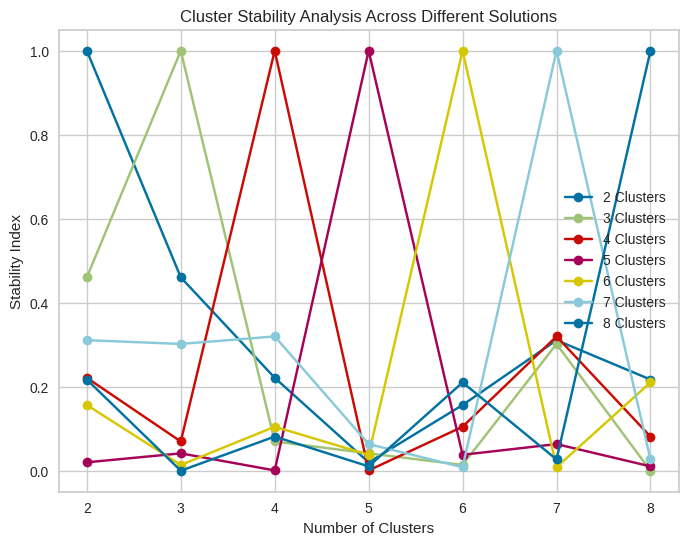

In [ ]:
cluster_range = range(2, 9)
stability_across_segments = []

for clusters in cluster_range:
    segment_labels = kmeans_models[str(clusters)].predict(df_encoded)
    stability_across_segments.append(segment_labels)

plt.figure(figsize=(8, 6))
for index, clusters in enumerate(cluster_range):
    stability_scores = [np.mean(stability_across_segments[index] == labels) for labels in stability_across_segments]
    plt.plot(cluster_range, stability_scores, marker='o', label=f'{clusters} Clusters')

plt.xlabel('Number of Clusters')
plt.ylabel('Stability Index')
plt.title('Cluster Stability Analysis Across Different Solutions')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()


## Segment Stability Analysis with Boxplot

In this section, we evaluate the stability of different segment solutions by calculating and normalizing the stability scores. We use a boxplot to visualize the distribution of normalized stability scores across different numbers of segments, helping to assess the consistency and quality of the clustering solutions.


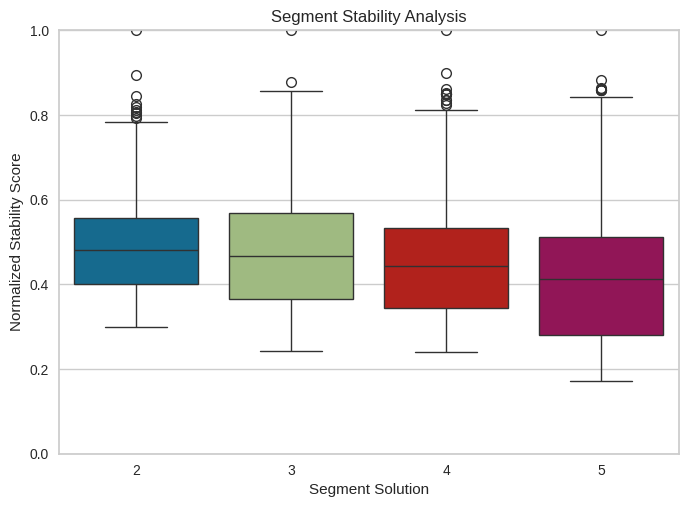

In [ ]:
segments = ["2", "3", "4", "5"]
stability_scores = []

for segment in segments:
    distance_to_centroid = kmeans_models[segment].transform(df_encoded).min(axis=1)
    normalized_scores = distance_to_centroid / np.max(distance_to_centroid)
    stability_scores.append(normalized_scores)

sns.boxplot(data=stability_scores, whis=1.5)
plt.xlabel("Segment Solution")
plt.ylabel("Normalized Stability Score")
plt.xticks(ticks=np.arange(len(segments)), labels=segments)
plt.ylim(0, 1)
plt.title("Segment Stability Analysis")
plt.show()


## Hierarchical Clustering of Attributes

In this section, we perform hierarchical clustering on the attributes of the dataset. We visualize the clustering results using a dendrogram, which shows the arrangement of attributes based on their similarity and the distances at which they are merged.


In [ ]:
attribute_distances = pdist(df_encoded.T, metric='euclidean')
hierarchy = linkage(attribute_distances, method='ward')
attribute_order = leaves_list(hierarchy)
ordered_attributes = df_encoded.columns[attribute_order]


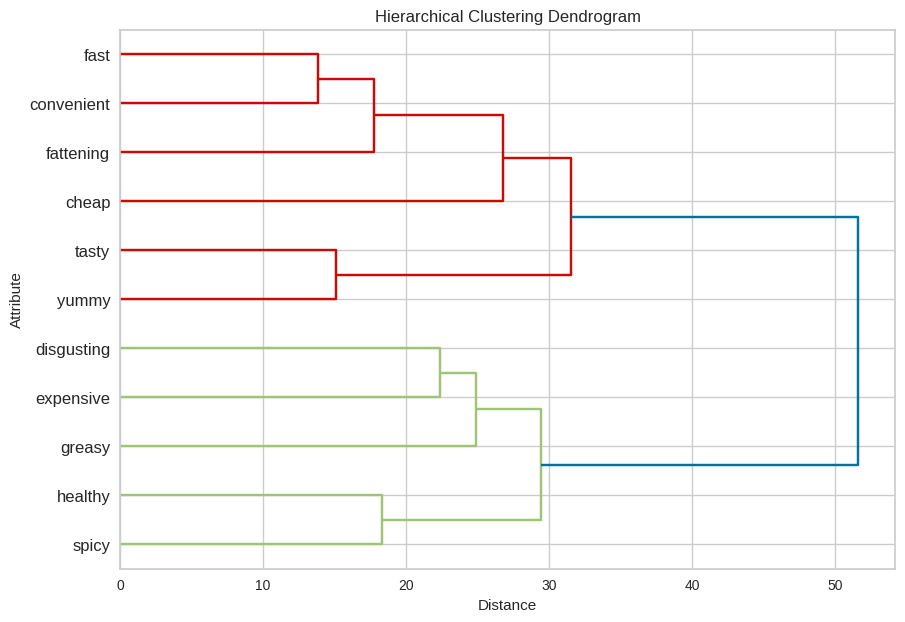

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy, labels=df_encoded.columns, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Attribute')
plt.show()

## Segment Profile Plot for KMeans Clustering

In this section, we visualize the profiles of each segment from the 4-segment KMeans clustering. The segment profile plot shows the mean values of attributes for each segment, providing insight into the characteristics and distribution of the data within each cluster.


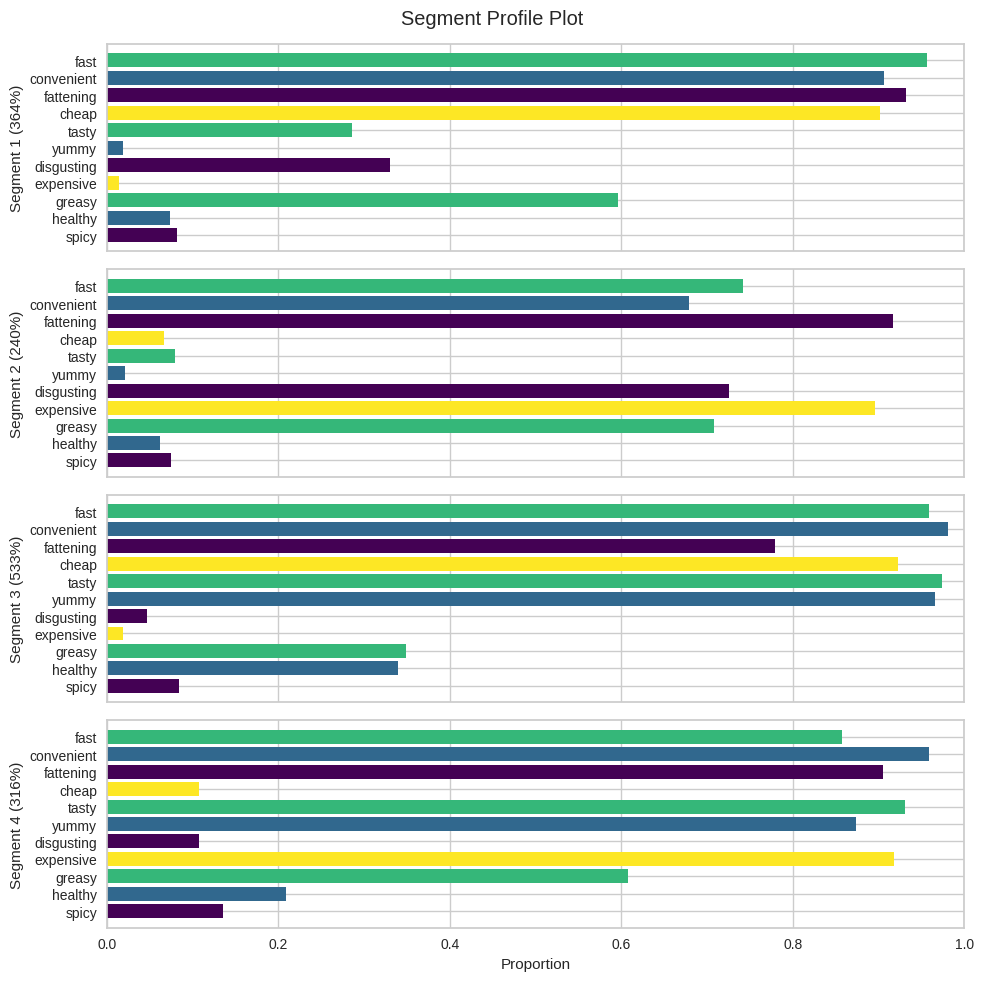

In [ ]:
segments = [kmeans_models["4"].labels_ == i for i in range(4)]
segment_sizes = [len(df_encoded[segment]) for segment in segments]
segment_means = [df_encoded[segment].mean() for segment in segments]

color = plt.cm.viridis(np.linspace(0, 1, len(segments)))

fig, axs = plt.subplots(len(segments), 1, figsize=(10, 10), sharex=True)

for i, segment_mean in enumerate(segment_means):
    axs[i].barh(ordered_attributes, segment_mean[ordered_attributes], color=color)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylabel(f'Segment {i + 1} ({segment_sizes[i]}%)')

plt.xlabel('Proportion')
plt.suptitle('Segment Profile Plot')
plt.tight_layout()
plt.show()


## PCA-Based Segment Separation Plot

In this section, we apply Principal Component Analysis (PCA) to reduce the data to two principal components. We then plot the separation of the segments from the 4-segment KMeans clustering in this reduced space, which helps visualize how distinct each segment is based on the principal components.


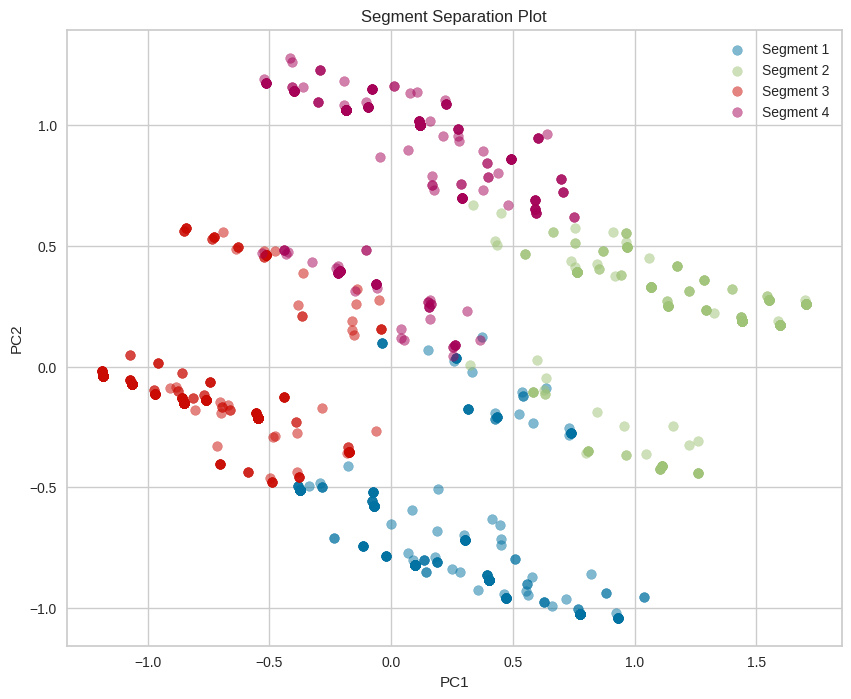

In [ ]:
pca = PCA(n_components=2)
pca_result2 = pca.fit_transform(df_encoded)

plt.figure(figsize=(10, 8))

for i in range(4):
    plt.scatter(pca_result2[segments[i], 0], pca_result2[segments[i], 1], label=f'Segment {i + 1}', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment Separation Plot')
plt.legend()
plt.grid(True)
plt.show()


## Mosaic Plot of Segment Membership and Preferences

In this section, we visualize the relationship between segment membership and preferences using a mosaic plot. This plot shows the distribution of responses to the "Like" question across different segments, providing insight into how each segment feels about the product.


In [ ]:
segment_labels = kmeans_models["4"].labels_
df['Segment'] = segment_labels
love_hate = df['Like']
gender = df['Gender']
age = df['Age']


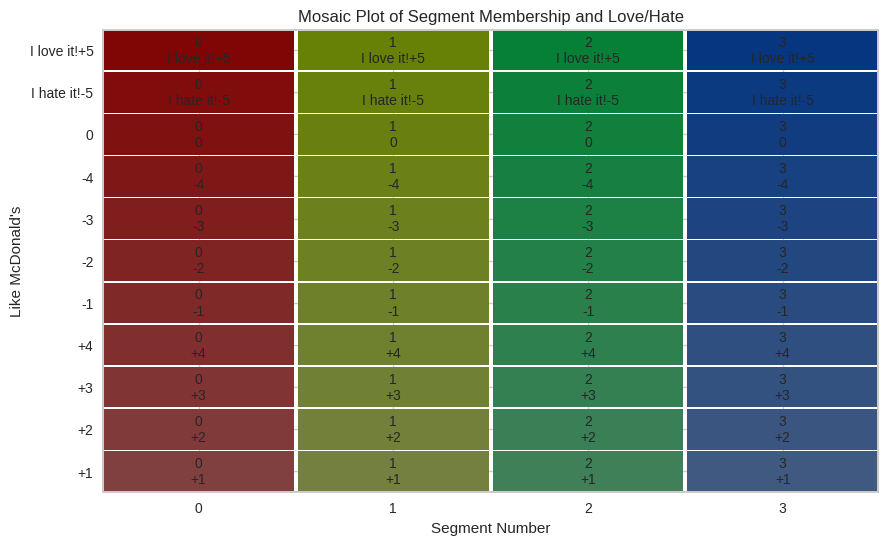

In [ ]:
cross_tab = pd.crosstab(df['Segment'], df['Like'])

data = cross_tab.stack().reset_index(name='count')
data.columns = ['Segment', 'Like', 'count']

fig, ax = plt.subplots(figsize=(10, 6))
mosaic(data, ['Segment', 'Like'], ax=ax)
ax.set_xlabel('Segment Number')
ax.set_ylabel('Like McDonald\'s')
plt.title('Mosaic Plot of Segment Membership and Love/Hate')
plt.show()



## Mosaic Plot of Segment Membership and Gender Distribution

In this section, we create a mosaic plot to explore the distribution of gender across different segments. This visualization helps understand how gender is distributed among the various segments identified by the KMeans clustering.


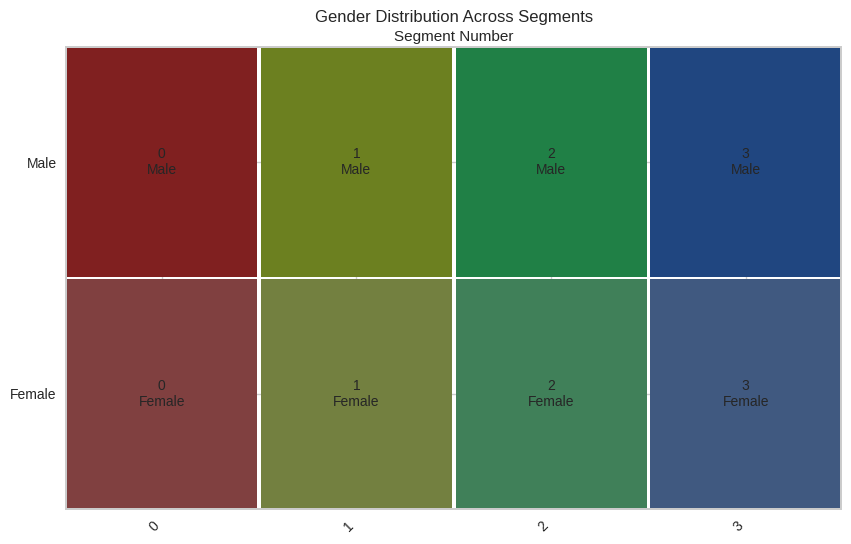

In [ ]:
cross_tab_gender = pd.crosstab(df['Segment'], df['Gender'])

data = cross_tab_gender.stack().reset_index(name='count')
data.columns = ['Segment', 'Gender', 'count']

fig, ax = plt.subplots(figsize=(10, 6))
mosaic(data, ['Segment', 'Gender'], ax=ax,
       title="Gender Distribution Across Segments")

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

plt.xlabel("Segment Number")
plt.ylabel("Gender")
plt.show()


## Box-and-Whisker Plot of Age Distribution Across Segments

In this section, we visualize the distribution of age across different segments using a box-and-whisker plot. This plot helps in understanding the variation and central tendency of age within each segment identified by the KMeans clustering.


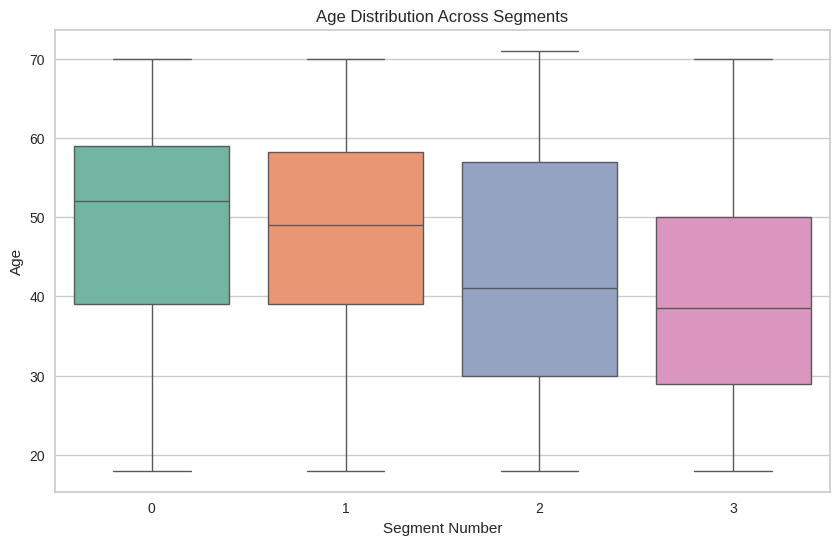

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', data=df, palette='Set2')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Age Distribution Across Segments')
plt.show()


## Decision Tree for Predicting Segment 3 Membership

In this section, we use a decision tree classifier to predict membership in Segment 3 based on features such as 'Like', 'Age', 'VisitFrequency', and 'Gender'. We first preprocess the data using one-hot encoding and then fit the classifier. The resulting decision tree is visualized to show how different features contribute to the classification decision.


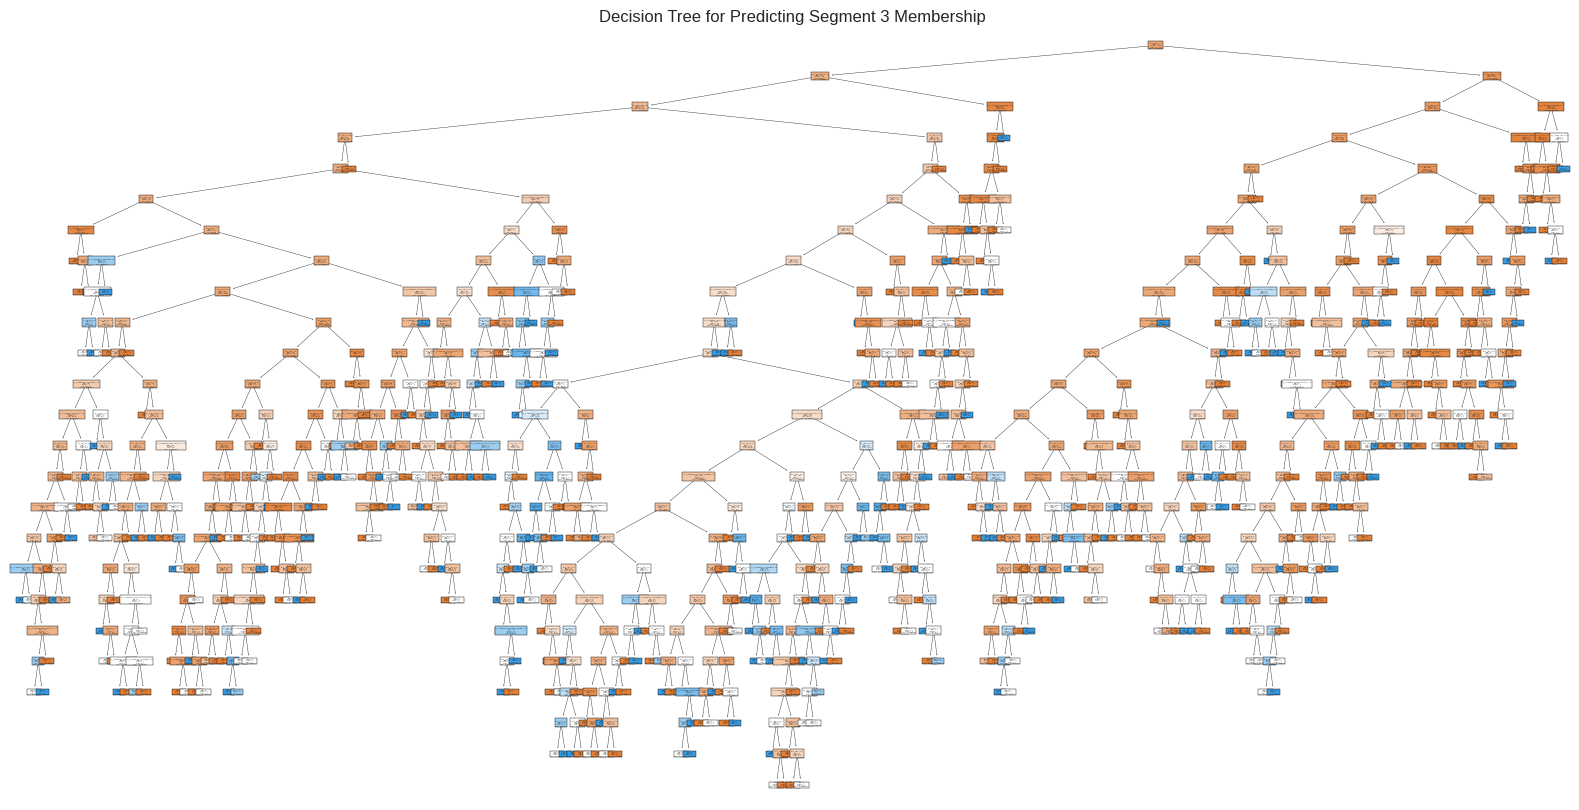

In [ ]:
X = df[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = df['Segment'] == 3

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Like', 'Gender', 'VisitFrequency']),
        ('num', 'passthrough', ['Age'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps['classifier'],
          feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(),
          class_names=['Not Segment 3', 'Segment 3'],
          filled=True)
plt.title('Decision Tree for Predicting Segment 3 Membership')
plt.show()

## Segment Evaluation Plot

In this section, we create a scatter plot to evaluate different segments based on their mean visit frequency and like scores. The size of each point represents the percentage of females in each segment, providing a comprehensive view of segment characteristics.


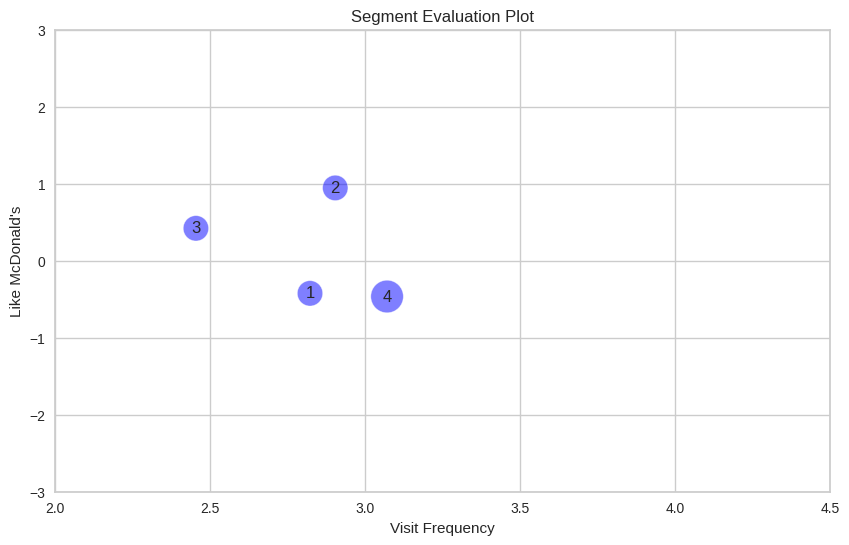

In [ ]:
df = pd.DataFrame({
    'Segment': np.random.randint(1, 5, size=100),
    'Like': np.random.uniform(-5, 5, size=100),
    'Age': np.random.randint(18, 70, size=100),
    'VisitFrequency': np.random.uniform(1, 5, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100)
})

visit_mean = df.groupby('Segment')['VisitFrequency'].mean()
like_mean = df.groupby('Segment')['Like'].mean()
female_percentage = df[df['Gender'] == 'Female'].groupby('Segment').size() / df.groupby('Segment').size()

visit_mean = visit_mean.reindex([1, 2, 3, 4], fill_value=np.nan)
like_mean = like_mean.reindex([1, 2, 3, 4], fill_value=np.nan)
female_percentage = female_percentage.reindex([1, 2, 3, 4], fill_value=0)

plt.figure(figsize=(10, 6))
plt.scatter(visit_mean, like_mean, s=1000 * female_percentage, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.xlabel('Visit Frequency')
plt.ylabel('Like McDonald\'s')
plt.title('Segment Evaluation Plot')
for i in range(1, 5):
    plt.text(visit_mean[i], like_mean[i], str(i), fontsize=12, ha='center', va='center')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()



# Conclusion

In this notebook, we performed an in-depth analysis of McDonald's customer data, leveraging various techniques such as PCA, KMeans clustering, hierarchical clustering, and decision trees.

Through PCA, we identified key attributes that influence customer perceptions. KMeans clustering revealed distinct customer segments with varying preferences and behaviors. Hierarchical clustering provided insights into the relationships between different attributes. Finally, the decision tree model demonstrated the potential for predicting segment membership based on customer characteristics.

These findings can be valuable for McDonald's in tailoring marketing strategies, improving customer satisfaction, and optimizing product offerings to target specific customer segments effectively.